In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
%matplotlib inline

#0 CLF:Nearest Neighbors  SCORE:0.3
#0 CLF:Linear SVM  SCORE:0.2791666666666667
#0 CLF:RBF SVM  SCORE:0.3
#0 CLF:Gaussian Process  SCORE:0.3
#0 CLF:Decision Tree  SCORE:0.3125
#0 CLF:Random Forest  SCORE:0.2791666666666667
#0 CLF:Neural Net  SCORE:0.30833333333333335
#0 CLF:AdaBoost  SCORE:0.4083333333333333
#0 CLF:Naive Bayes  SCORE:0.42083333333333334


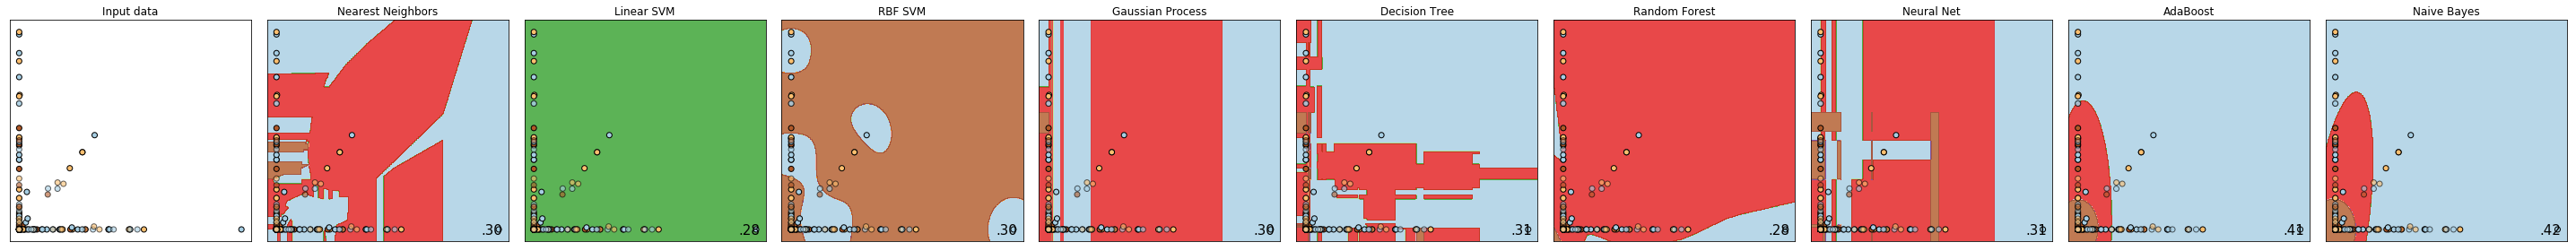

In [6]:
#Classifier Comparision
#https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025,cache_size=8000),
    SVC(gamma=1, C=1,cache_size=8000),
    #GaussianProcessClassifier(1.0 * RBF(1.0),n_jobs=-1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1,n_jobs=-1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]
df = pd.read_table("kmers_training_set_DEL_K11_HDIST7_FLANK100_SA1_SC0.txt")

X = np.vstack(np.asarray( (df['START_RATIO'],df['END_RATIO']), order = 'C', dtype='float' )).T
y = np.array(df['GT'])

linearly_separable = (X, y)

datasets = [#make_moons(noise=0.3, random_state=0),
            #make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(40,4))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.Paired
    cm_bright = plt.cm.Paired #ListedColormap(['#000000', '#b00000','#0058b0'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        
        Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
        
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1
        print('#{} CLF:{}  SCORE:{}'.format(ds_cnt,name,score))

plt.tight_layout()
plt.savefig('example_clf.png',dpi=500)
plt.show()

/home/bucephalus/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/home/bucephalus/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


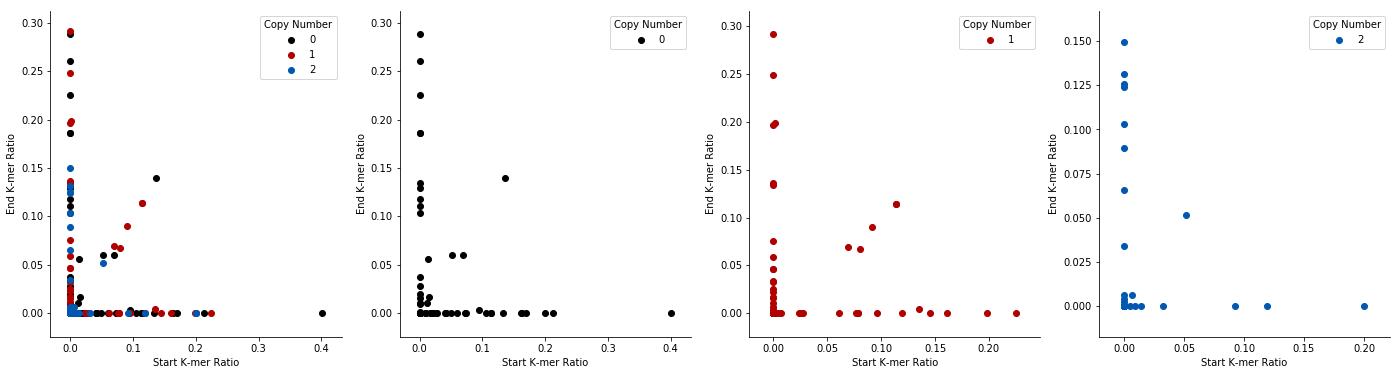

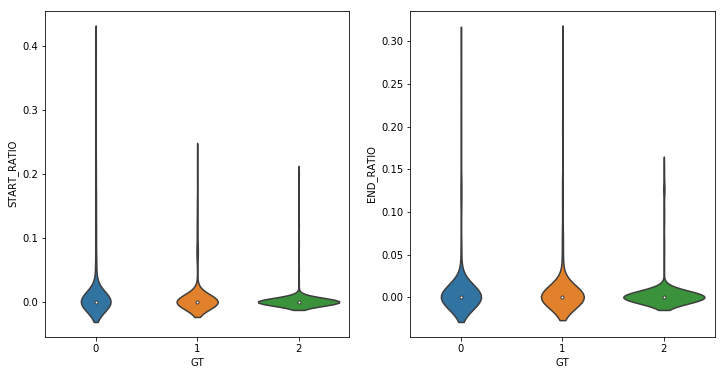

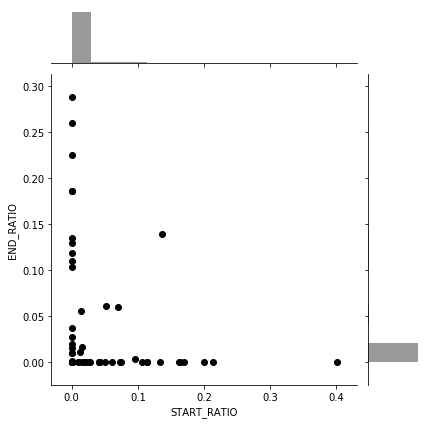

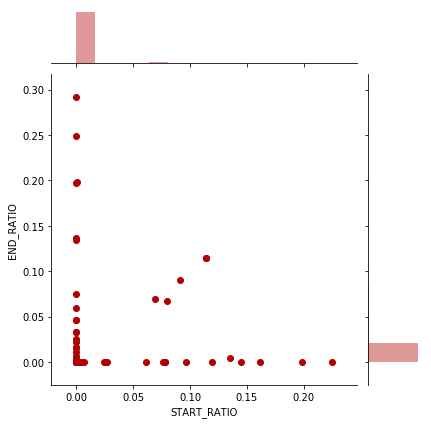

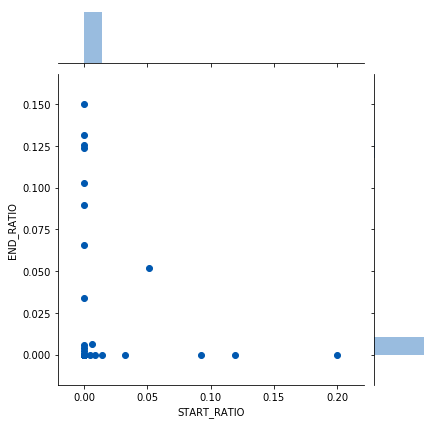

In [8]:
df = pd.read_table("kmers_training_set_DEL_K11_HDIST7_FLANK100_SA1_SC0.txt")
# plot the training set
# just for visualization purposes 
f, ax = plt.subplots(1,4,figsize=(24,6))
cols = ['#000000', '#b00000','#0058b0']
for i,gt in enumerate(set(df['GT'])):
    tmp = df.loc[df['GT']==gt]
    ax[0].scatter(x=tmp['START_RATIO'],y=tmp['END_RATIO'],label=gt,color=cols[i])
    ax[i+1].scatter(x=tmp['START_RATIO'],y=tmp['END_RATIO'],label=gt,color=cols[i])
for a in ax:
    a.legend(title='Copy Number')
    a.set_xlabel('Start K-mer Ratio')
    a.set_ylabel('End K-mer Ratio')
sns.despine(f)
f.show()
#clearly in this example the boundaries for each genotype is not as distinct. 
#Therefore this K=5, HDIST=4 is probably not the best set of parameters

f , ax = plt.subplots(1,2,figsize=(12,6))
sns.violinplot(x='GT',y='START_RATIO',data=df,ax=ax[0])
sns.violinplot(x='GT',y='END_RATIO',data=df,ax=ax[1])
f.show()

for i,gt in enumerate(set(df['GT'])):
    tmp = df.loc[df['GT']==gt]
    sns.jointplot(x=tmp['START_RATIO'],y=tmp['END_RATIO'],label=gt,color=cols[i])



In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import f1_score, precision_score, recall_score,confusion_matrix
import scipy.stats
from sklearn.preprocessing import label_binarize

# precision = PPV
# recall = TPR (sensitivity)
# https://en.wikipedia.org/wiki/Confusion_matrix

def get_training_set(path):
    df = pd.read_table(path)
    X = np.vstack(np.asarray( (df['START_RATIO'],df['END_RATIO']), order = 'C', dtype='float' )).T
    y = np.array(df['GT'])
    return X,y,df

class Perform():
    def __init__(self):
        self.fdr=[]
        self.ppv=[]
        self.tpr=[]
        self.f1=[]

def calc_stats(a,confidence=0.95):
    a = 1.0 * np.array(a)
    n = len(a)
    m, se = np.nanmean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return [m, m+h, m-h]

def parse_filename(path):
    file_name = path.split('/').pop().replace('.txt','').replace('kmers_training_set_','').split('_')
    svtype, klen, hdist, flank, sa, sc = file_name
    return [svtype,klen.replace('K',''),hdist.replace('HDIST',''),
           flank.replace('FLANK',''), sa.replace('SA',''), sc.replace('SC','')
           ]

my_file="kmers_training_set_DEL_K11_HDIST7_FLANK100_SA1_SC0.txt"
X,y,df = get_training_set(my_file)
# cross validation iterator 5-folds
# Stratified means we keep the same proportions of class labels in 
# each fold. Meaning, for fold #1 the proportion of GT=0 is the same 
# for fold # 3...

cv = StratifiedKFold(n_splits=3)

rand_num = 42 # pick a random state to replicate your results


Results = [

    Perform(), # GT=0
    Perform(), # GT=1
    Perform()  # GT=2
]

for train_idx, test_idx in cv.split(X,y):
    #define the features and labels for training and testing
    X_train, X_test = X[train_idx],X[test_idx]
    y_train, y_test = y[train_idx],y[test_idx]
    
    #init the classifier, here a Support Vector Classifier
    #with a Radial Basis Function kernel (RBF)
    # gamma and C govern the error function and descision boundaries
    # you can change the values if you like, however keep the same 
    # values consistent for your evaluation of different k-mer parameters
    #
    # predict_proba=True ensures that probability scores for a
    clf = AdaBoostClassifier()
    #SVC(gamma=1, C=1,random_state=rand_num,probability=True)
    
    # train the classifier
    clf.fit(X_train,y_train)
    
    # predict genotypes on test data
    y_pred = clf.predict(X_test)
    preds = label_binarize(y_pred,classes=[0,1,2])
    tests = label_binarize(y_test,classes=[0,1,2])
    for i in range(0,3):
        # true_negative, false_positive, false_negative, true_positive
        tn,fp,fn,tp = confusion_matrix(tests[:,i],preds[:,i]).ravel()
    
        # false discovery rate
        fdr = fp / (fp+tp)
        # precision
        ppv = precision_score(tests[:,i],preds[:,i])
        # sensitivity 
        tpr = recall_score(tests[:,i],preds[:,i])
        # F1 
        f1 = f1_score(tests[:,i],preds[:,i])
    
        Results[i].fdr.append(fdr)
        Results[i].ppv.append(ppv)
        Results[i].tpr.append(tpr)
        Results[i].f1.append(f1)
    
# calculate mean and 95% CI 

ofh = open('my_results.txt','w')

header = ['#SVTYPE','KLEN','HDIST','FLANK','SA','SC','GT','FDR','FDR_HI','FDR_LO',
         'PRECISION','PRECISION_HI','PRECISION_LO',
         'SENSITIVITY','SENSITIVITY_HI','SENSITIVITY_LO',
         'F1','F1_HI','F1_LO']

ofh.write('\t'.join(header)+'\n')

for i in range(0,3):
    
    output = calc_stats(Results[i].fdr) + calc_stats(Results[i].ppv) + calc_stats(Results[i].tpr)  + calc_stats(Results[i].f1)

    output = parse_filename(my_file) + [i] + output

    ofh.write('\t'.join(map(str,output))+'\n')

ofh.close()
print("done")

done
